In [16]:
import pandas as pd
from scipy.io import arff

In [17]:
# Load the ARFF file
file_path = "dataset/iris.arff"
data, meta = arff.loadarff(file_path)

# Convert to DataFrame
df = pd.DataFrame(data)

# Decode byte strings in categorical column (if necessary)
df[df.select_dtypes([object]).columns] = df.select_dtypes([object]).apply(lambda x: x.str.decode('utf-8'))

# Display dataset info and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


(None,
    sepallength  sepalwidth  petallength  petalwidth        class
 0          5.1         3.5          1.4         0.2  Iris-setosa
 1          4.9         3.0          1.4         0.2  Iris-setosa
 2          4.7         3.2          1.3         0.2  Iris-setosa
 3          4.6         3.1          1.5         0.2  Iris-setosa
 4          5.0         3.6          1.4         0.2  Iris-setosa)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [19]:
# Separate features and target variable
X = df.iloc[:, :-1].values  # Feature matrix
y = df.iloc[:, -1].values   # Target variable

# Encode categorical labels into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for better NN and k-NN performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check the shape of the split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [21]:
# Train k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Using k=5 as a common choice
knn.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn.predict(X_test)

# Evaluate performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.9333333333333333

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [23]:
# Train Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt.predict(X_test)

# Evaluate performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2%}")

Decision Tree Accuracy: 90.00%


In [24]:
from sklearn.neural_network import MLPClassifier

# Train Neural Network classifier
nn = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=1000, random_state=42)
nn.fit(X_train, y_train)

# Predict on test set
y_pred_nn = nn.predict(X_test)

# Evaluate performance
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {accuracy_nn:.2%}")


Neural Network Accuracy: 96.67%


In [25]:
print(f"k-NN Accuracy: {accuracy_knn:.2%}")
print(f"Decision Tree Accuracy: {accuracy_dt:.2%}")
print(f"Neural Network Accuracy: {accuracy_nn:.2%}")


k-NN Accuracy: 93.33%
Decision Tree Accuracy: 90.00%
Neural Network Accuracy: 96.67%


In [26]:
# Select only petal length and petal width as features
X_selected = df[['petallength', 'petalwidth']].values
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Standardize
X_train_sel = scaler.fit_transform(X_train_sel)
X_test_sel = scaler.transform(X_test_sel)

# Retrain classifiers with selected features
knn.fit(X_train_sel, y_train)
dt.fit(X_train_sel, y_train)
nn.fit(X_train_sel, y_train)

# Evaluate performance
y_pred_knn_sel = knn.predict(X_test_sel)
y_pred_dt_sel = dt.predict(X_test_sel)
y_pred_nn_sel = nn.predict(X_test_sel)

print(f"k-NN Accuracy (Selected Features): {accuracy_score(y_test, y_pred_knn_sel):.2%}")
print(f"Decision Tree Accuracy (Selected Features): {accuracy_score(y_test, y_pred_dt_sel):.2%}")
print(f"Neural Network Accuracy (Selected Features): {accuracy_score(y_test, y_pred_nn_sel):.2%}")

k-NN Accuracy (Selected Features): 96.67%
Decision Tree Accuracy (Selected Features): 93.33%
Neural Network Accuracy (Selected Features): 93.33%


c:\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

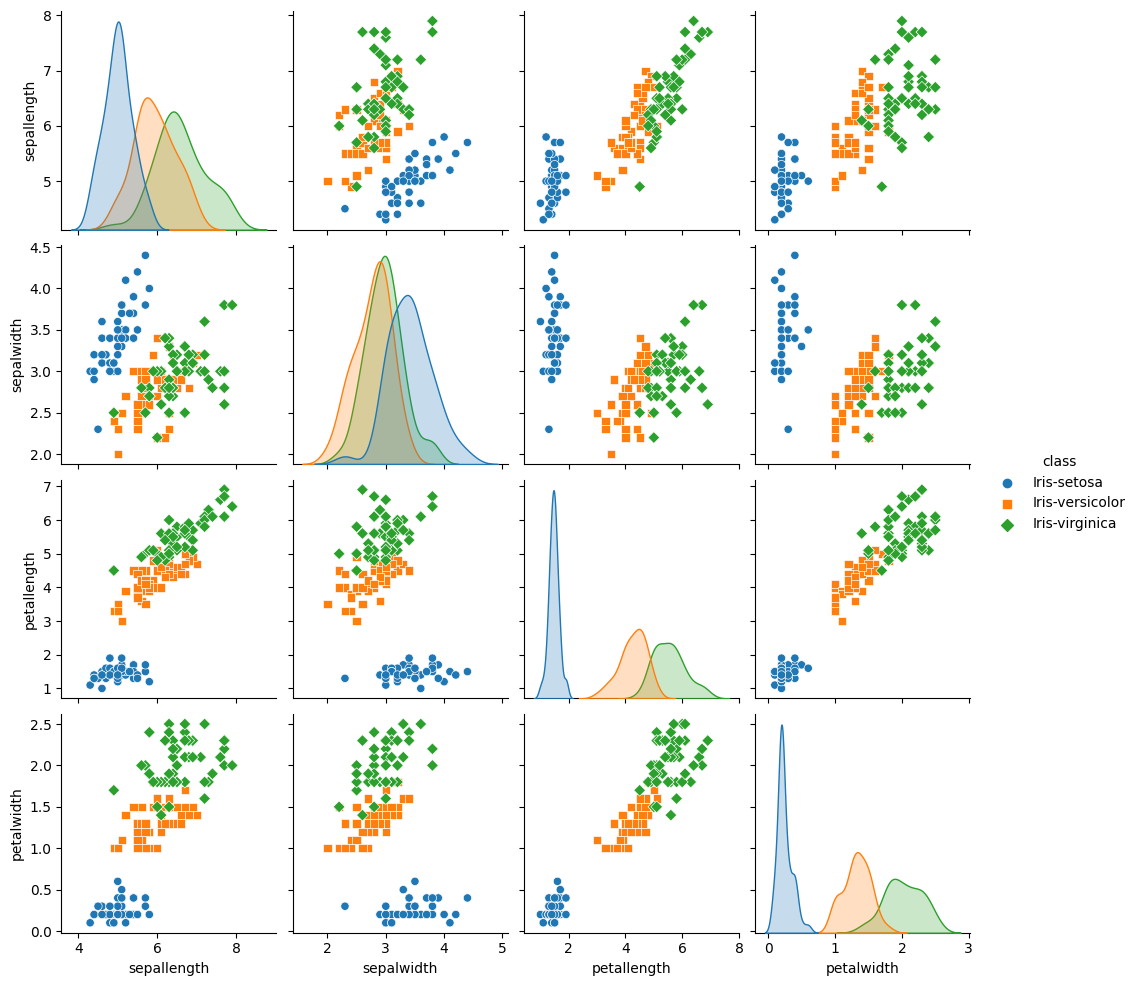

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to a Pandas DataFrame for visualization
df['class'] = label_encoder.inverse_transform(y)  # Restore class labels

# Pairplot to see feature relationships
sns.pairplot(df, hue="class", diag_kind="kde", markers=["o", "s", "D"])
plt.show()

<Figure size 500x400 with 0 Axes>

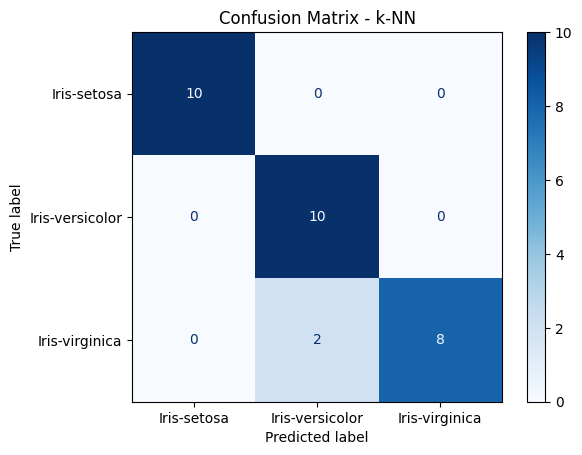

<Figure size 500x400 with 0 Axes>

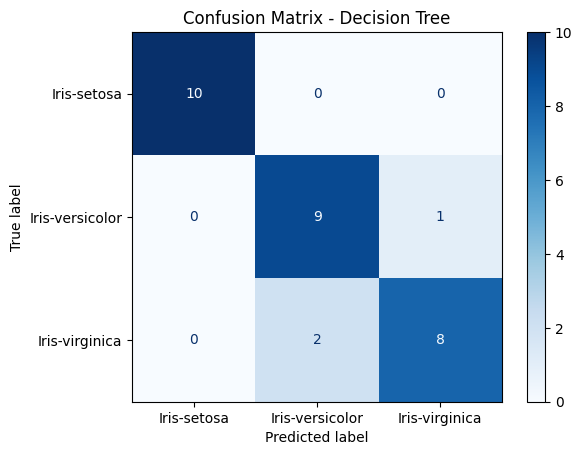

<Figure size 500x400 with 0 Axes>

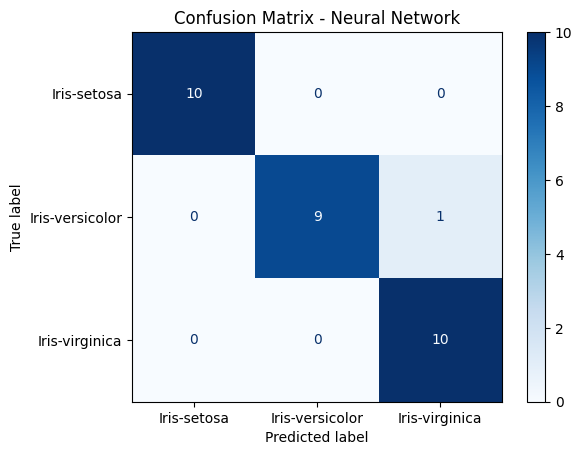

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {'k-NN': y_pred_knn, 'Decision Tree': y_pred_dt, 'Neural Network': y_pred_nn}

for model_name, y_pred in models.items():
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    
    plt.figure(figsize=(5, 4))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

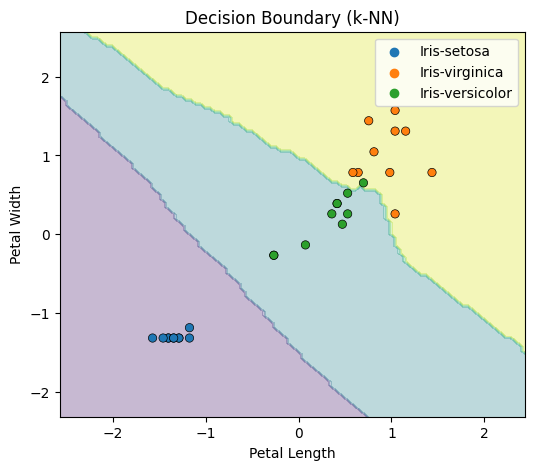

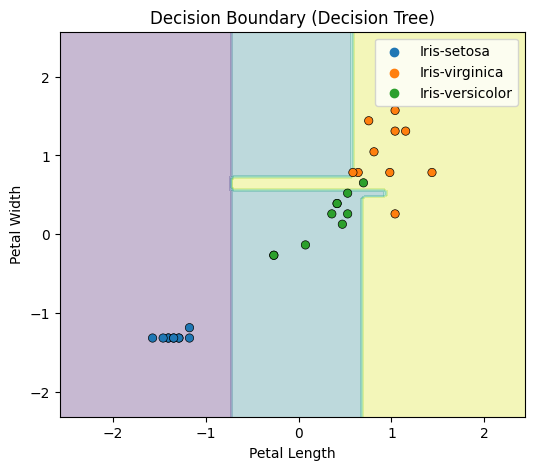

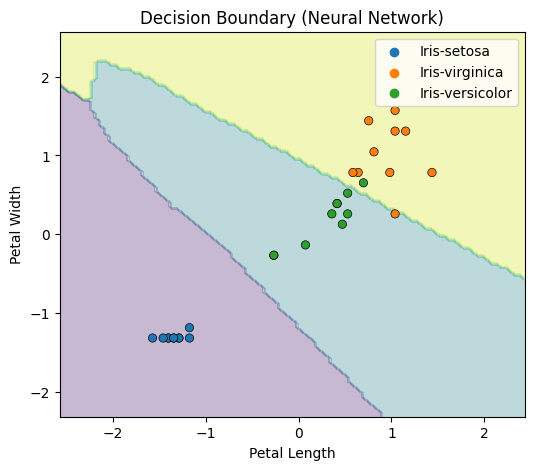

In [15]:
import numpy as np

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Predict for mesh points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=label_encoder.inverse_transform(y), edgecolor="k")
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.title(title)
    plt.show()

# Train models on only two features
knn.fit(X_train_sel, y_train)
dt.fit(X_train_sel, y_train)
nn.fit(X_train_sel, y_train)

# Plot decision boundaries
plot_decision_boundary(knn, X_test_sel, y_test, "Decision Boundary (k-NN)")
plot_decision_boundary(dt, X_test_sel, y_test, "Decision Boundary (Decision Tree)")
plot_decision_boundary(nn, X_test_sel, y_test, "Decision Boundary (Neural Network)")
